In [7]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [8]:
import pandas as pd
url_string="https://github.com/SowrovDey/Blood-Disease/blob/main/diagnosed_cbc_data_v4.csv"

In [12]:
df=pd.read_csv("diagnosed_cbc_data_v4.csv")
df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [13]:
df.head(10)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia
5,6.6,27.3,65.4,1.8,4.3,3.96,8.8,29.7,75.2,22.2,79.6,207.0,11.5,0.18,Other microcytic anemia
6,16.7,19.1,68.2,3.2,11.4,5.15,14.2,44.8,87.1,27.5,31.6,151.0,12.8,0.14,Leukemia
7,9.3,27.4,64.0,2.6,5.9,4.39,12.0,37.9,86.4,27.3,31.6,194.0,15.9,0.19,Normocytic hypochromic anemia
8,5.2,19.7,72.4,1.0,3.8,4.85,13.2,41.0,84.7,27.2,32.1,181.0,10.0,0.15,Healthy
9,10.5,12.4,79.0,1.3,8.3,4.57,12.4,38.9,85.3,27.1,31.8,164.0,11.3,0.14,Normocytic hypochromic anemia


In [16]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset :', df.shape[0])

Number of Features In Dataset : 15
Number of Instances In Dataset : 1281


In [17]:
# Drop the unnecessary column 'Diagnosis' if you want to keep only features for modeling
df = df.drop(columns=['Diagnosis'])


In [19]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset :', df.shape[0])

Number of Features In Dataset : 14
Number of Instances In Dataset : 1281


In [20]:
df.head()


,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WBC     1281 non-null   float64
 1   LYMp    1281 non-null   float64
 2   NEUTp   1281 non-null   float64
 3   LYMn    1281 non-null   float64
 4   NEUTn   1281 non-null   float64
 5   RBC     1281 non-null   float64
 6   HGB     1281 non-null   float64
 7   HCT     1281 non-null   float64
 8   MCV     1281 non-null   float64
 9   MCH     1281 non-null   float64
 10  MCHC    1281 non-null   float64
 11  PLT     1281 non-null   float64
 12  PDW     1281 non-null   float64
 13  PCT     1281 non-null   float64
dtypes: float64(14)
memory usage: 140.2 KB


In [22]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


In [25]:
df.duplicated().sum()

np.int64(49)

In [26]:
df.isnull().sum()

WBC      0
LYMp     0
NEUTp    0
LYMn     0
NEUTn    0
RBC      0
HGB      0
HCT      0
MCV      0
MCH      0
MCHC     0
PLT      0
PDW      0
PCT      0
dtype: int64

In [27]:
df.isna().sum()

WBC      0
LYMp     0
NEUTp    0
LYMn     0
NEUTn    0
RBC      0
HGB      0
HCT      0
MCV      0
MCH      0
MCHC     0
PLT      0
PDW      0
PCT      0
dtype: int64

In [55]:
# Exploratory Data Analysis (EDA) - Graphical Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# For EDA, use only numeric columns to avoid ValueError with string columns like 'Diagnosis'
numeric_df = df.select_dtypes(include=['number'])



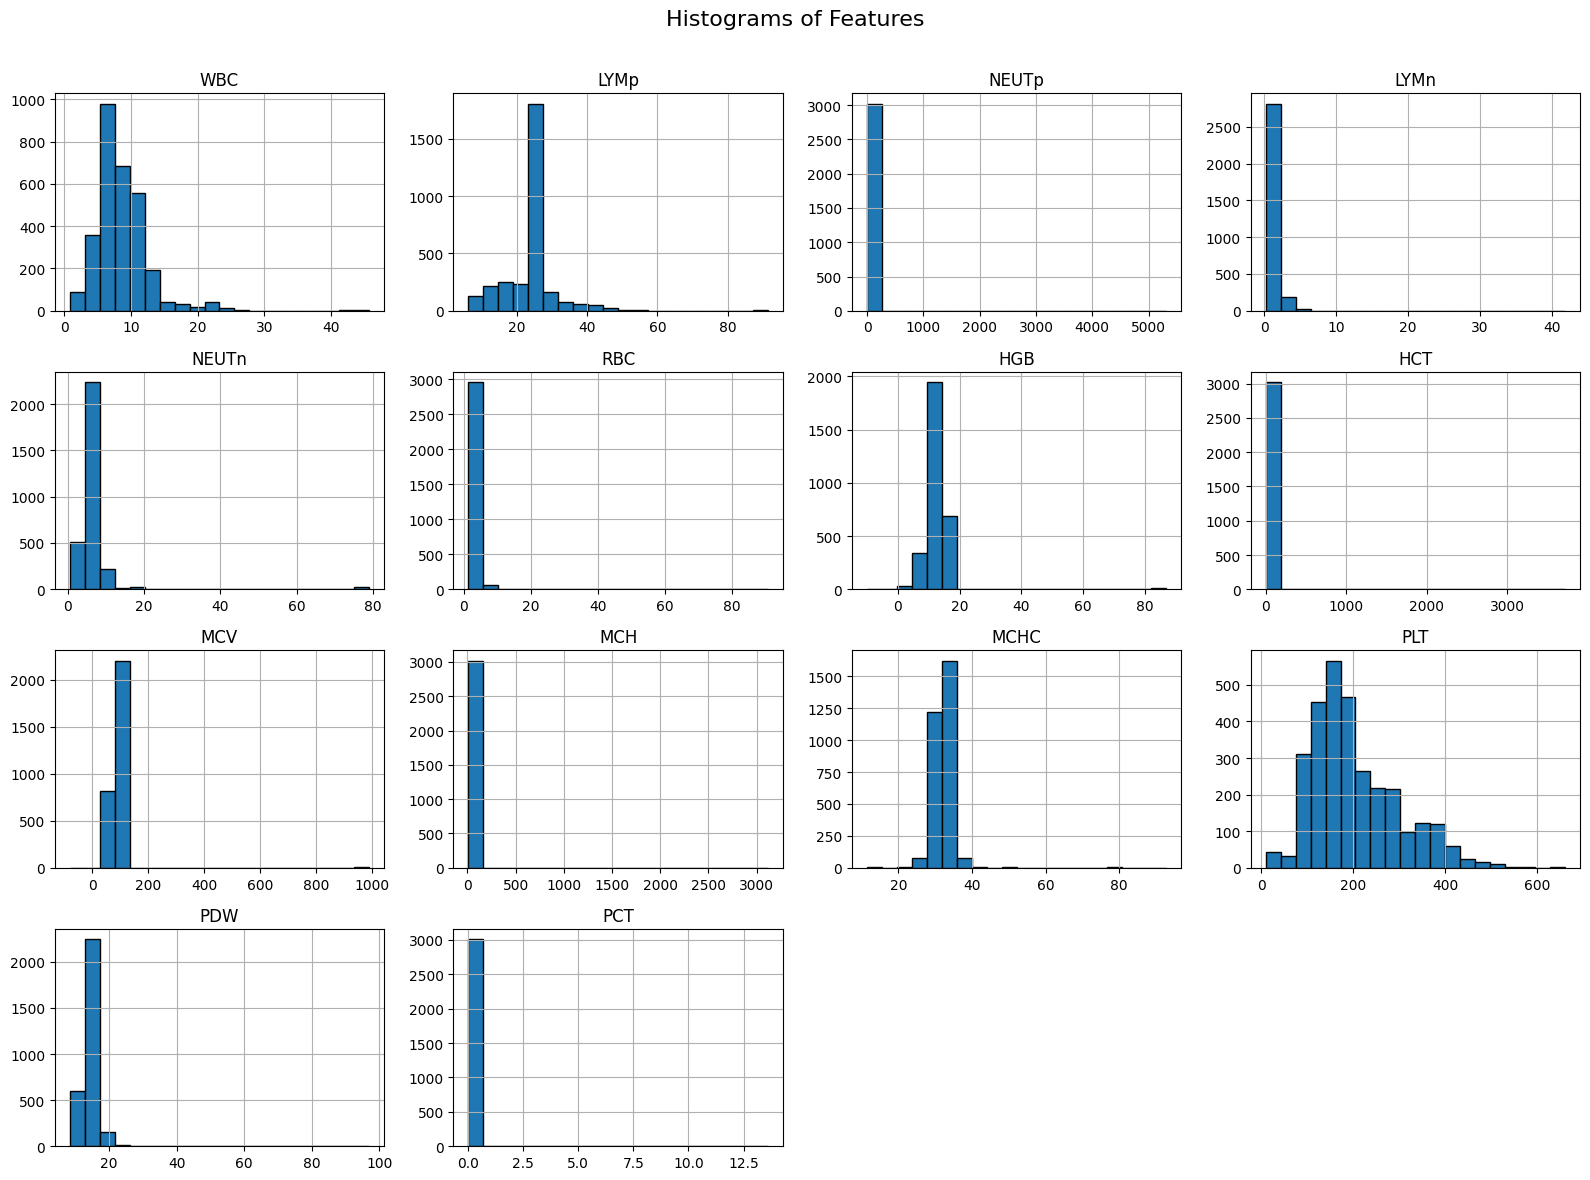

In [39]:
# 1. Histograms for all features
numeric_df.hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.97))
plt.show()

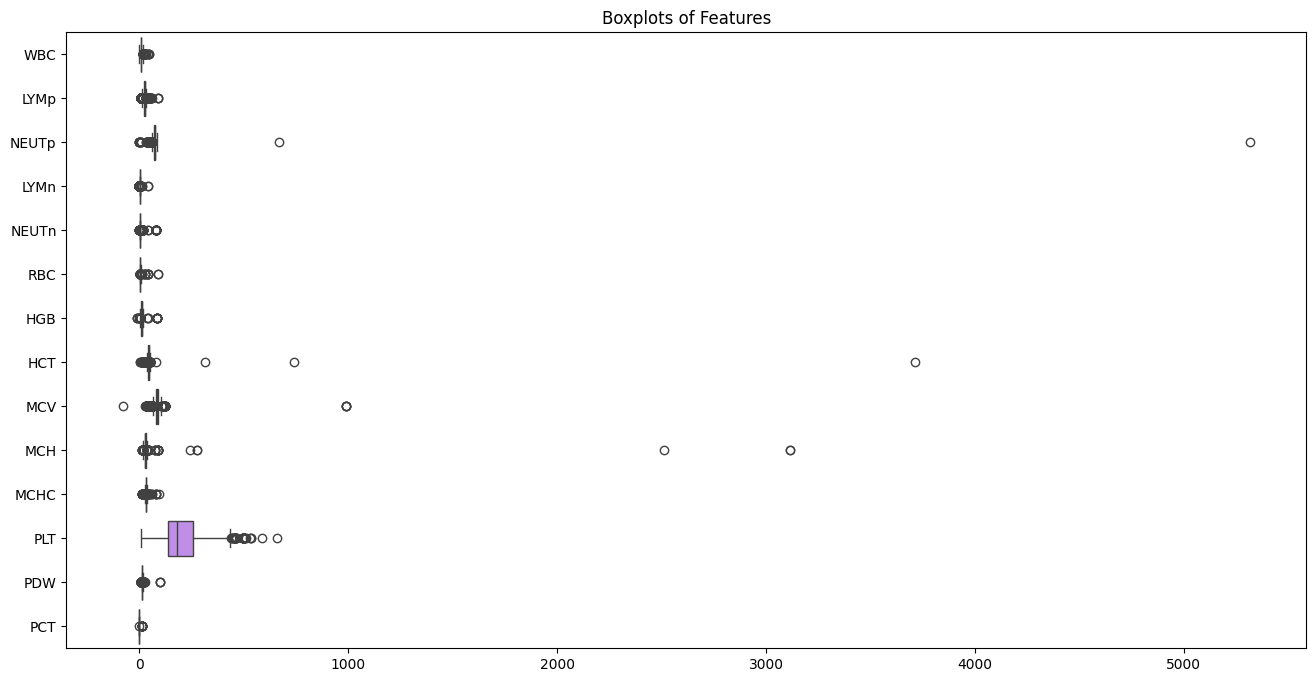

In [40]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=numeric_df, orient="h")
plt.title('Boxplots of Features')
plt.show()

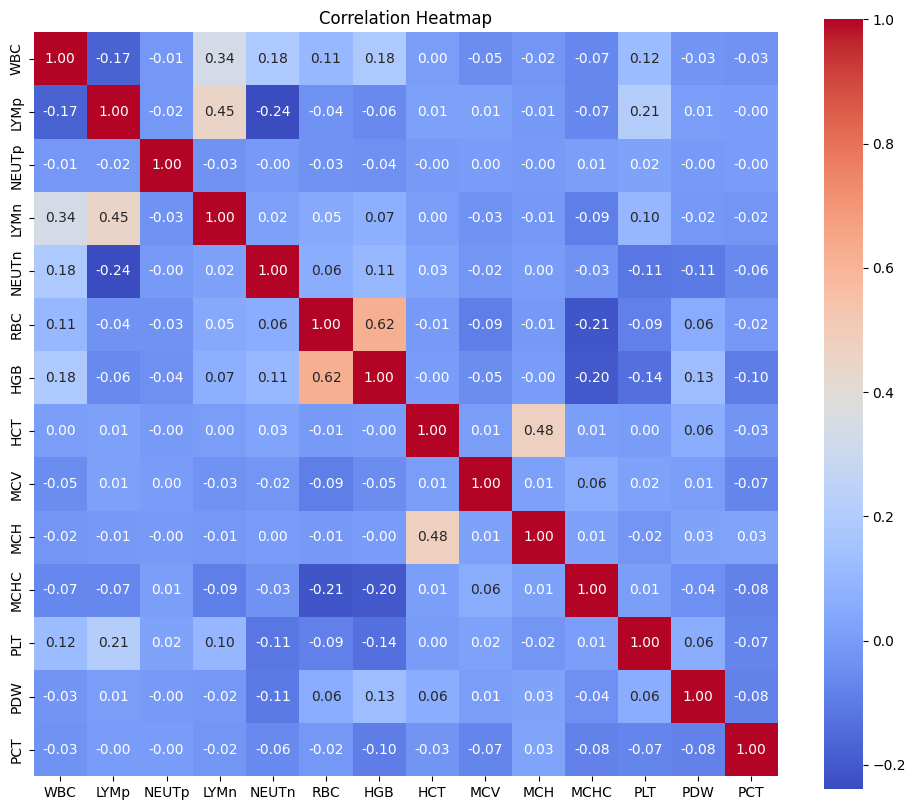

In [41]:
# 3. Correlation heatmap
plt.figure(figsize=(12, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


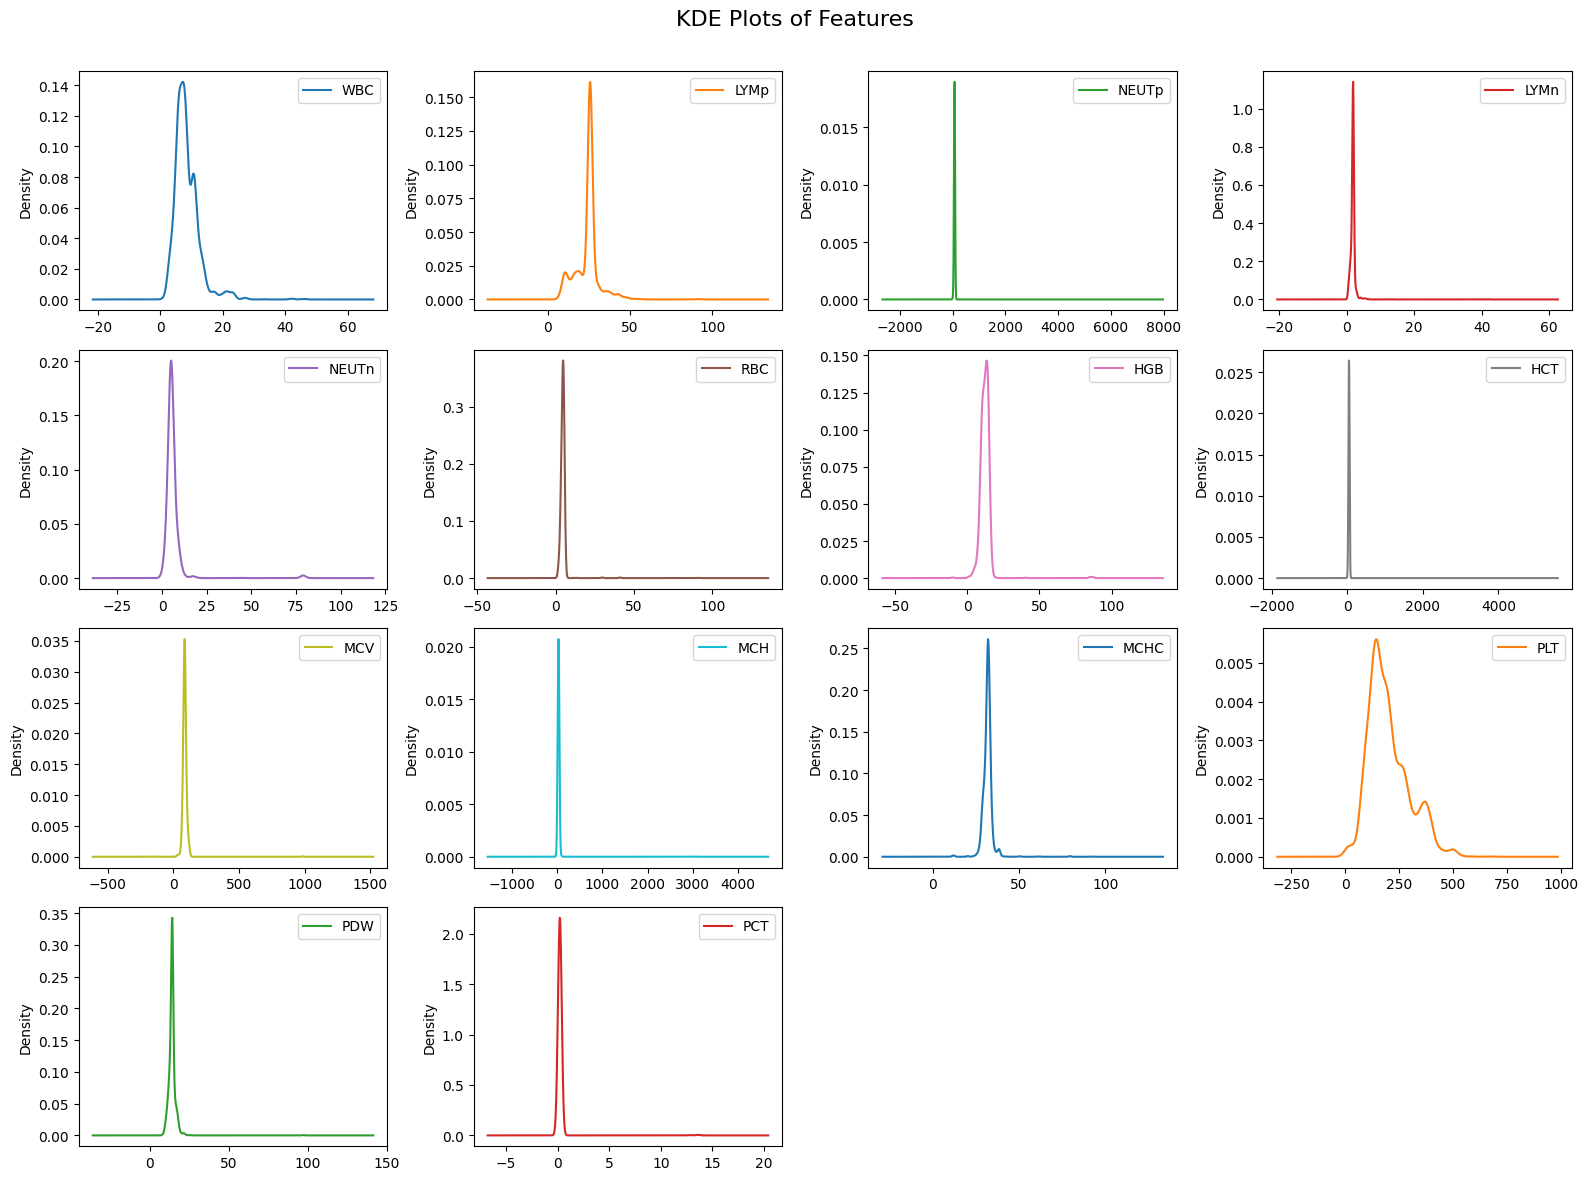

In [42]:
# 4. KDE plots for all features
numeric_df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(16, 12))
plt.suptitle('KDE Plots of Features', fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.97))
plt.show()

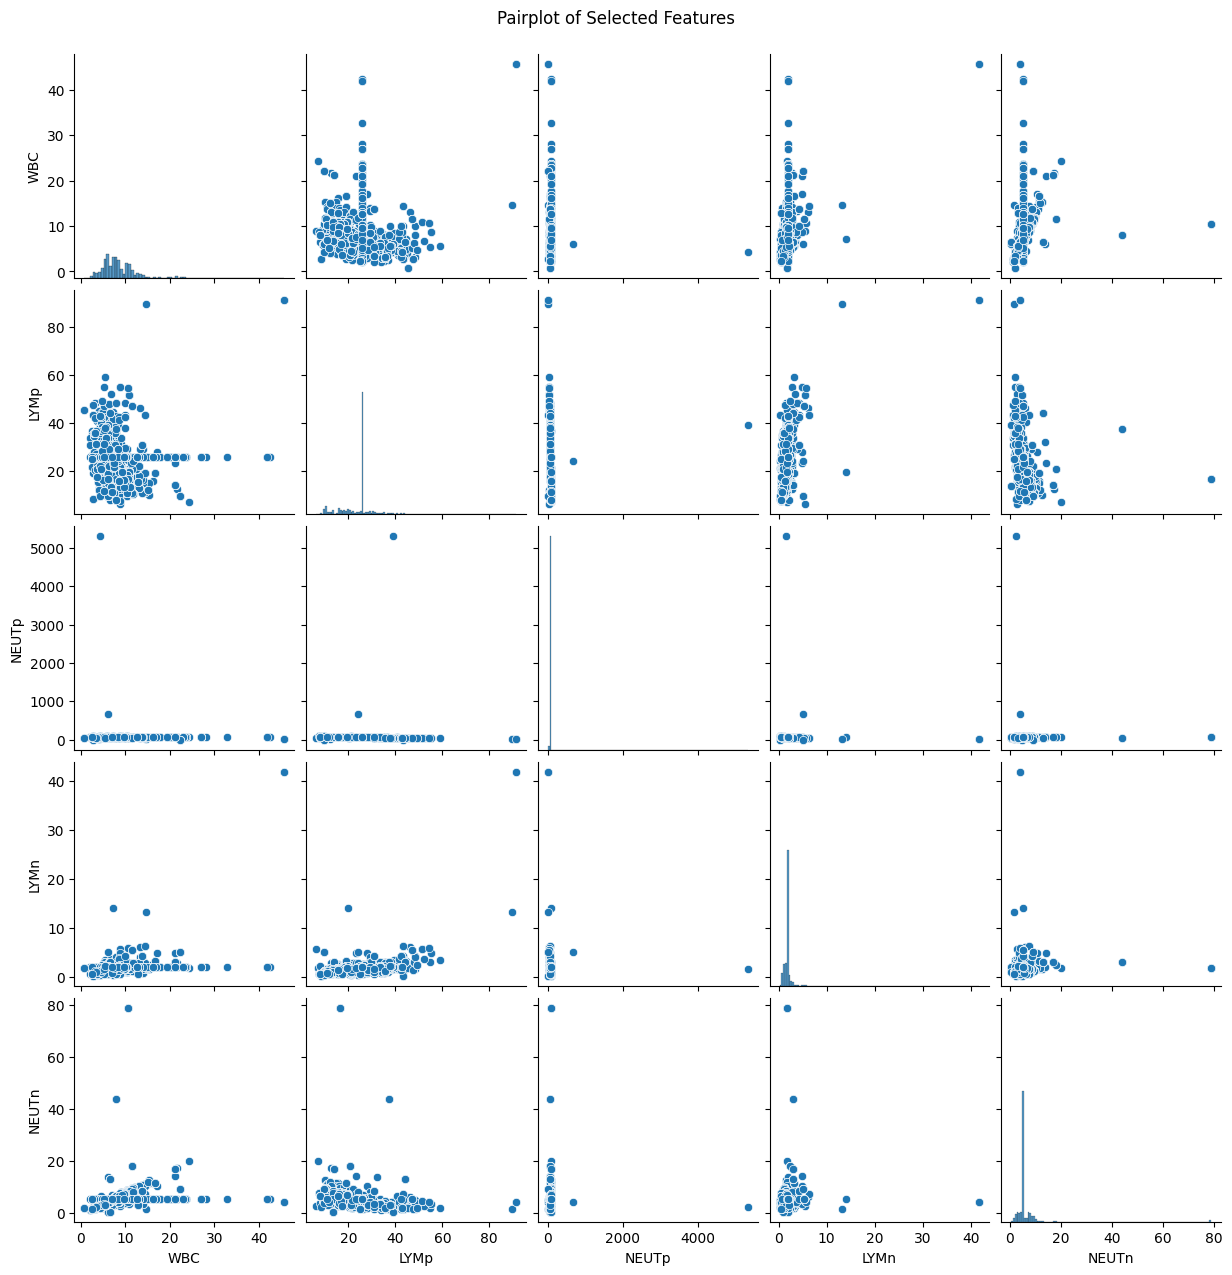

In [44]:
# 5. Pairplot for selected features (if too many features, select a few)
if isinstance(numeric_df, pd.DataFrame):
    selected_cols = numeric_df.columns[:5]  # Select first 5 numeric features for demonstration
    sns.pairplot(numeric_df[selected_cols].copy())
    plt.suptitle('Pairplot of Selected Features', y=1.02)
    plt.show()


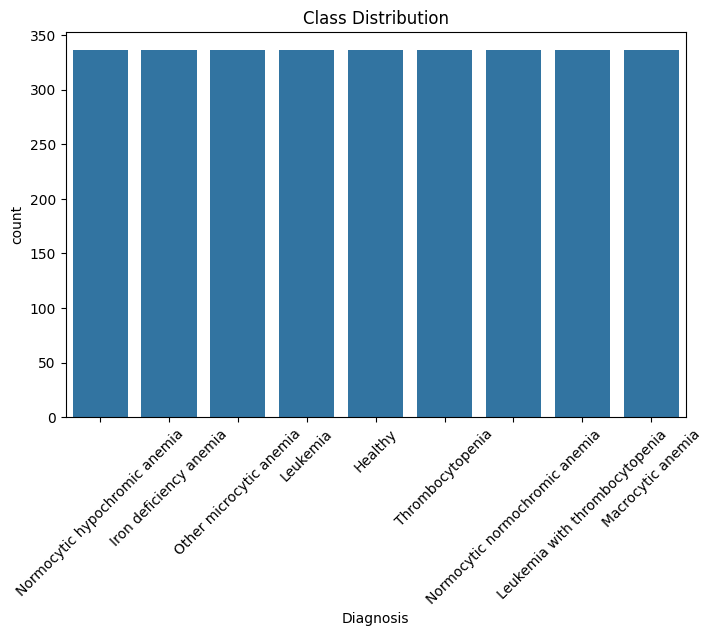

In [46]:
# 6. If 'Diagnosis' column exists, plot class distribution and feature distributions by class
if 'Diagnosis' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Diagnosis', data=df, order=df['Diagnosis'].value_counts().index)
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

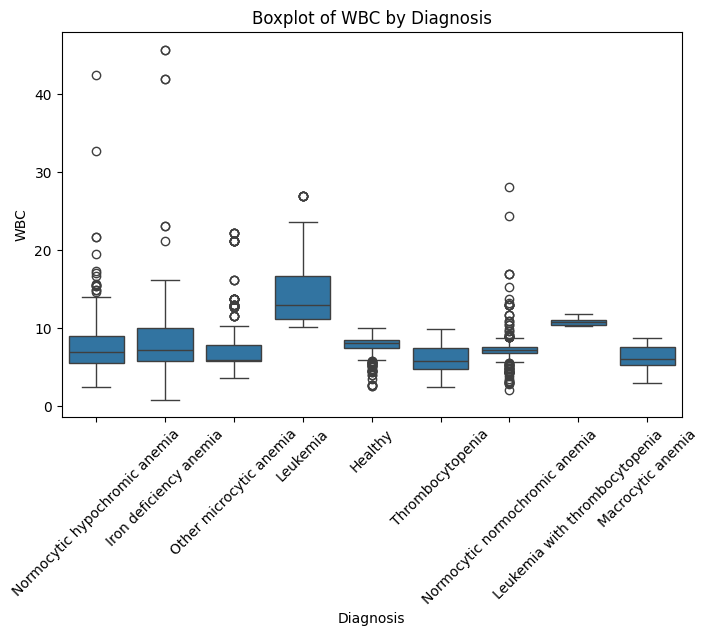

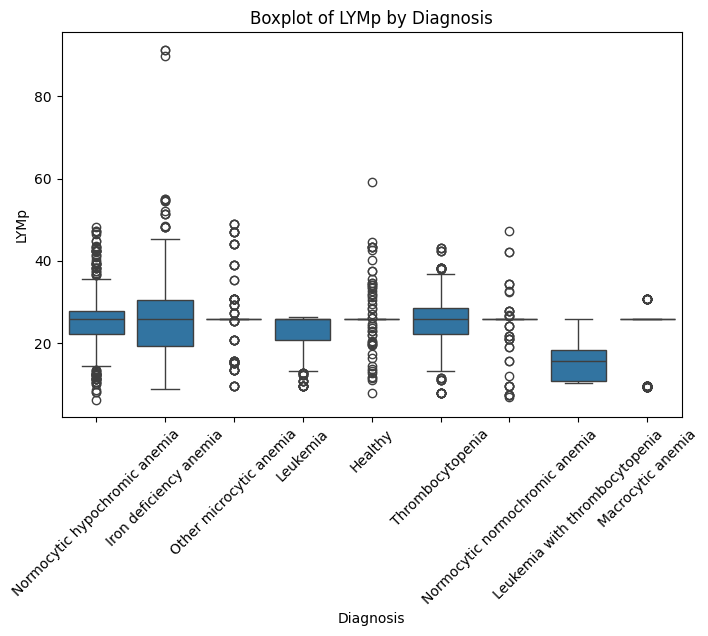

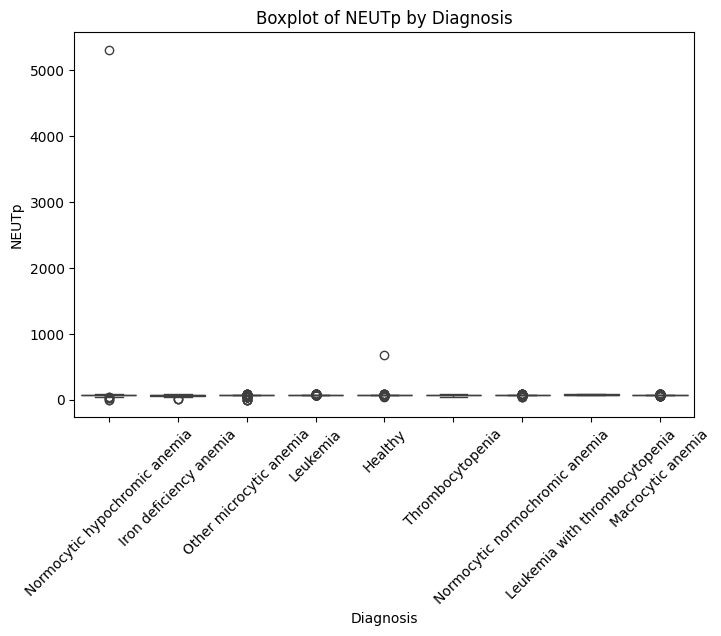

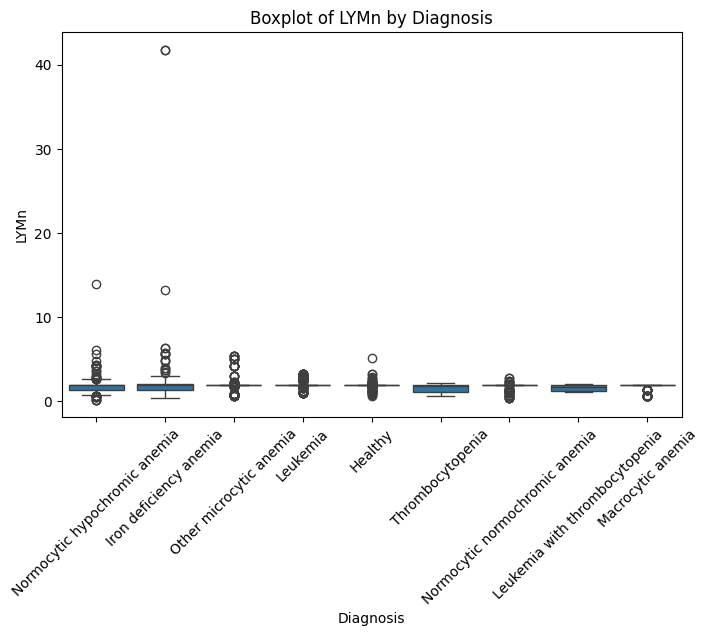

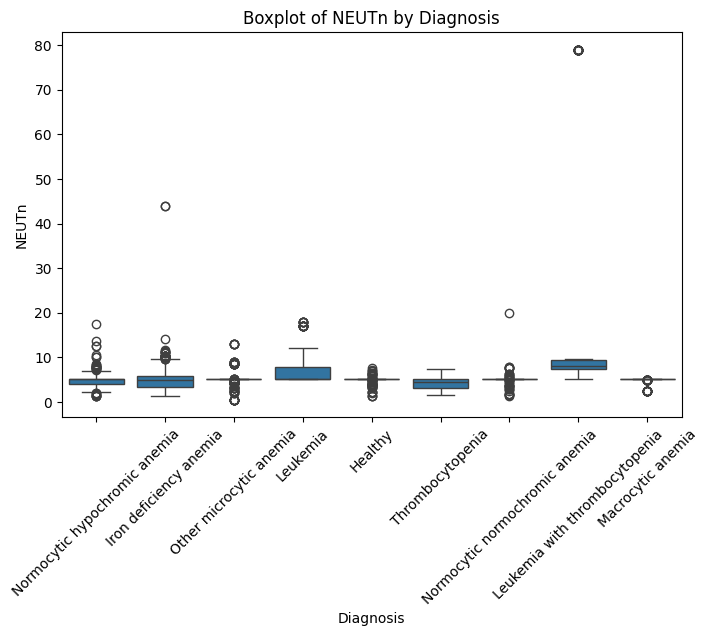

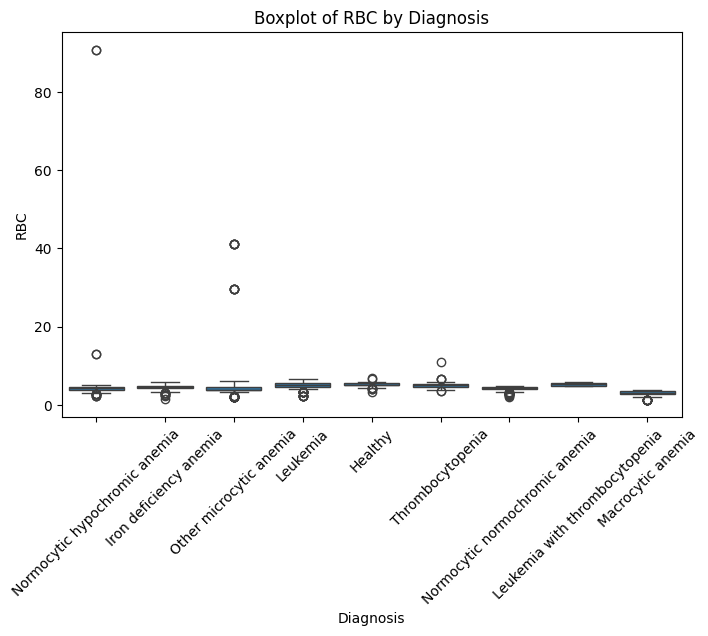

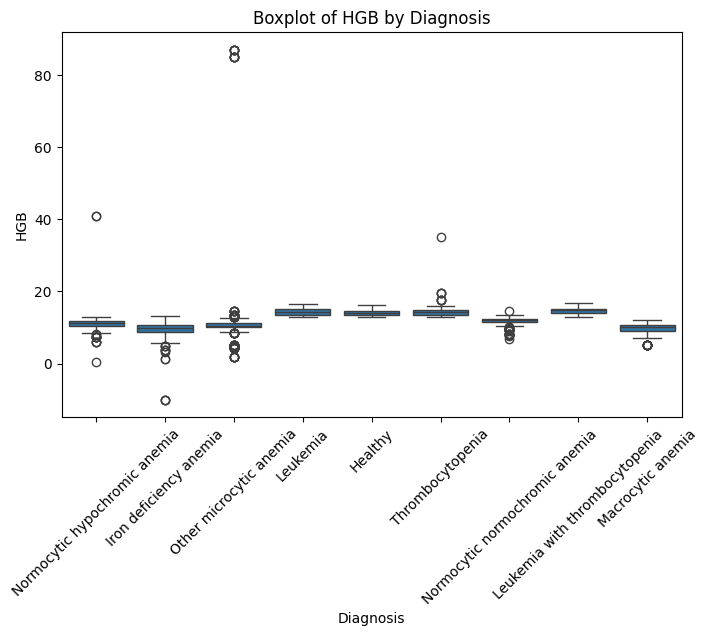

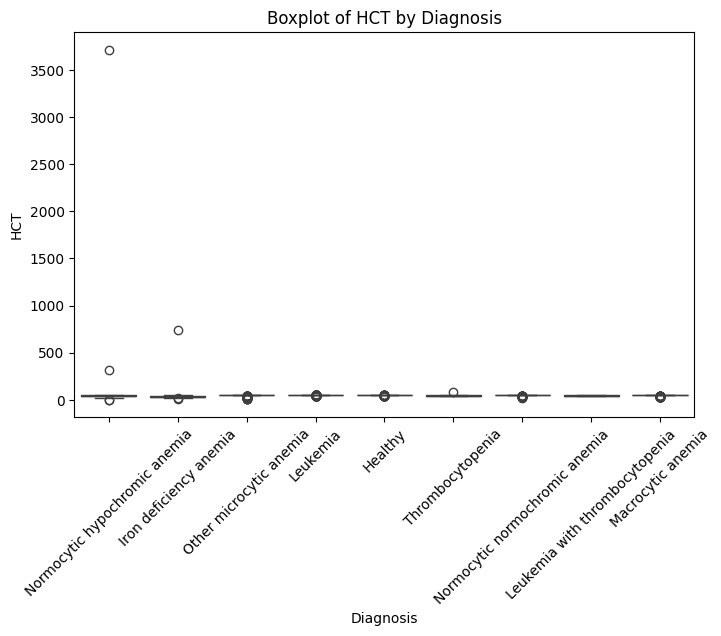

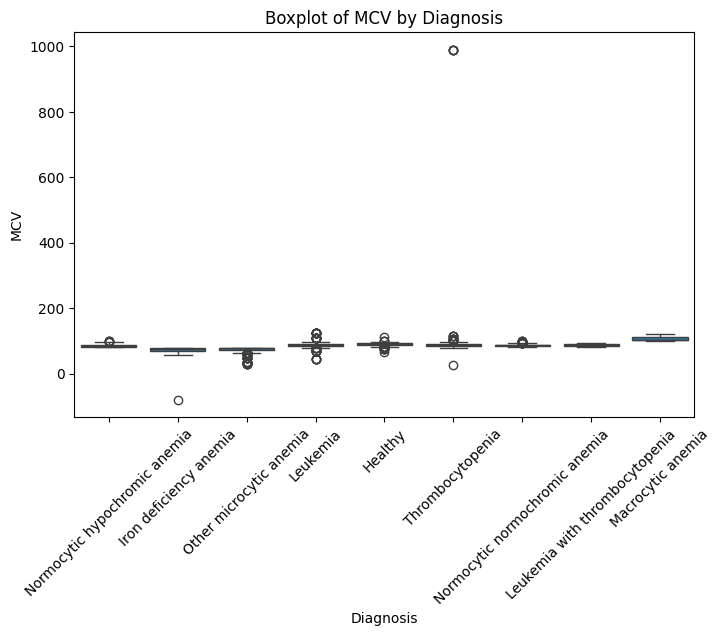

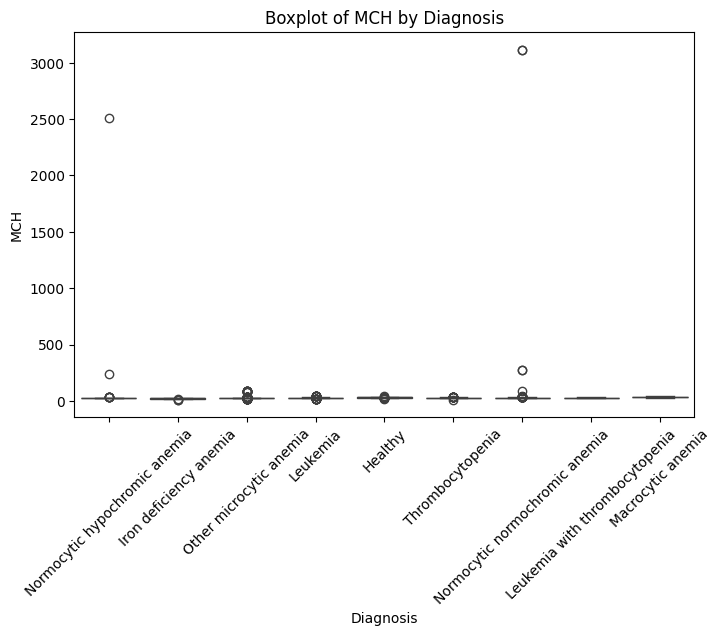

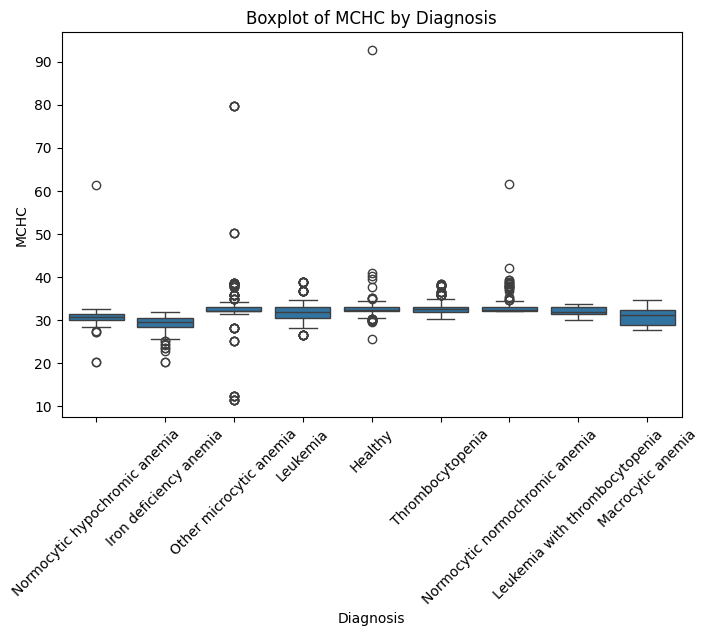

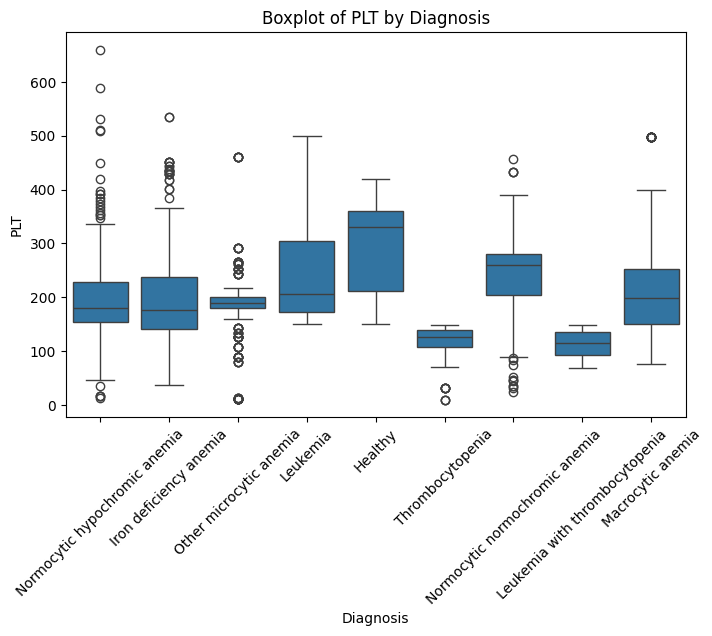

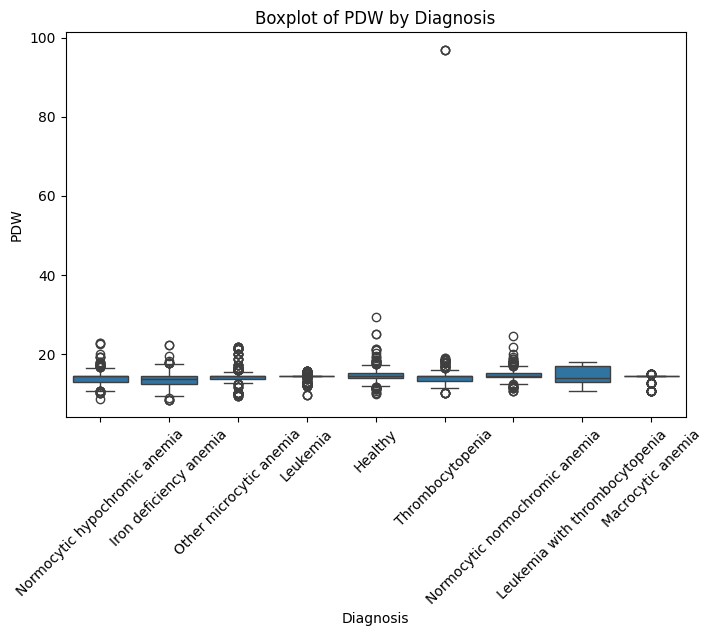

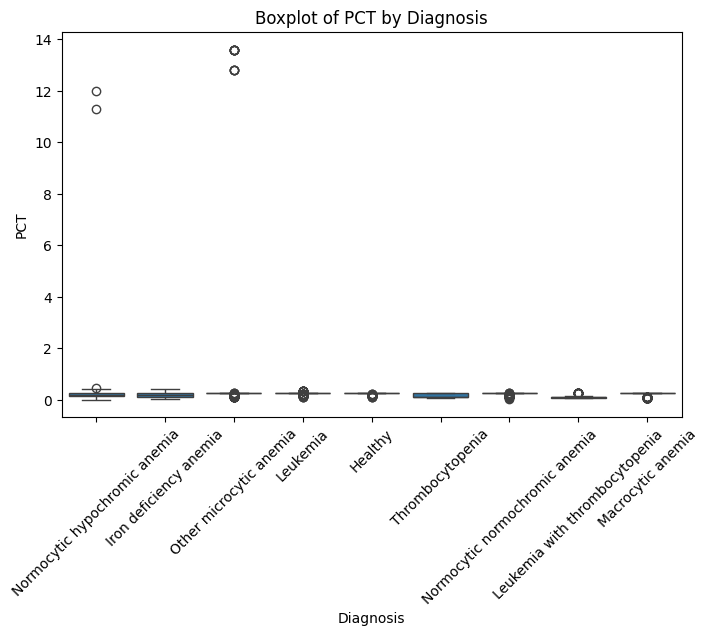

In [53]:
# Boxplots of features grouped by Diagnosis
for col in numeric_df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f'Boxplot of {col} by Diagnosis')
    plt.xticks(rotation=45)
    plt.show()

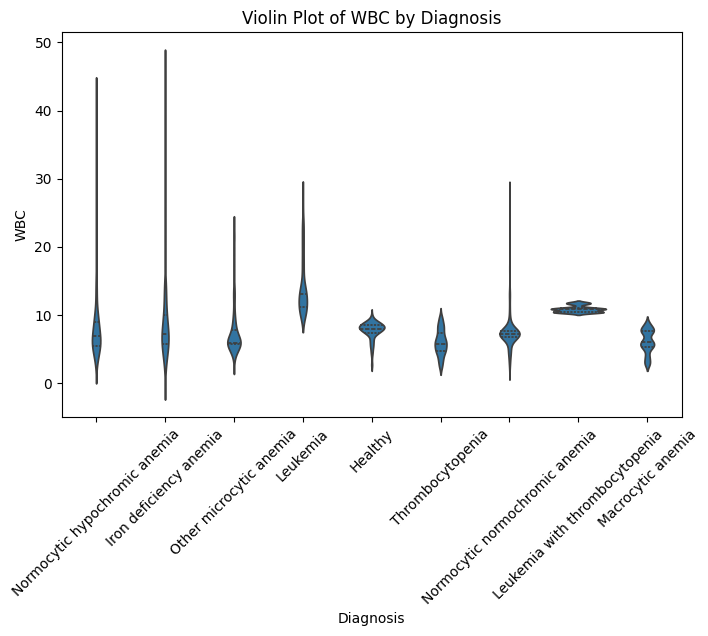

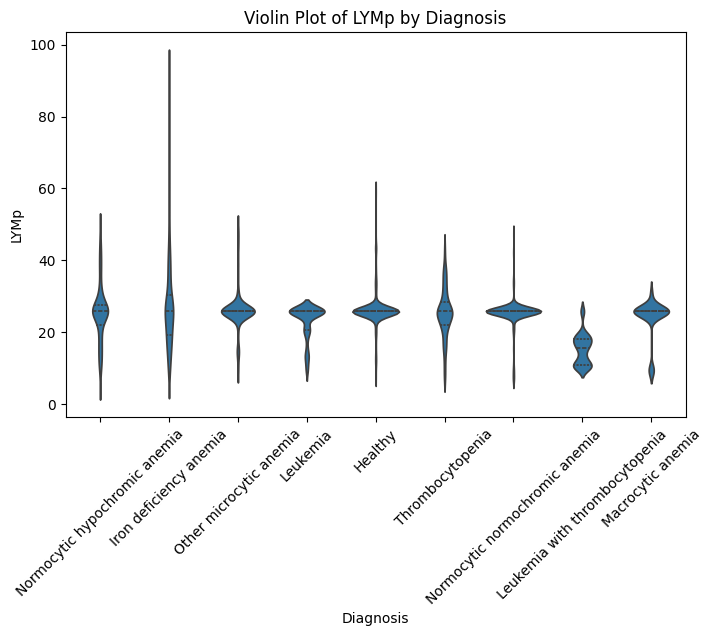

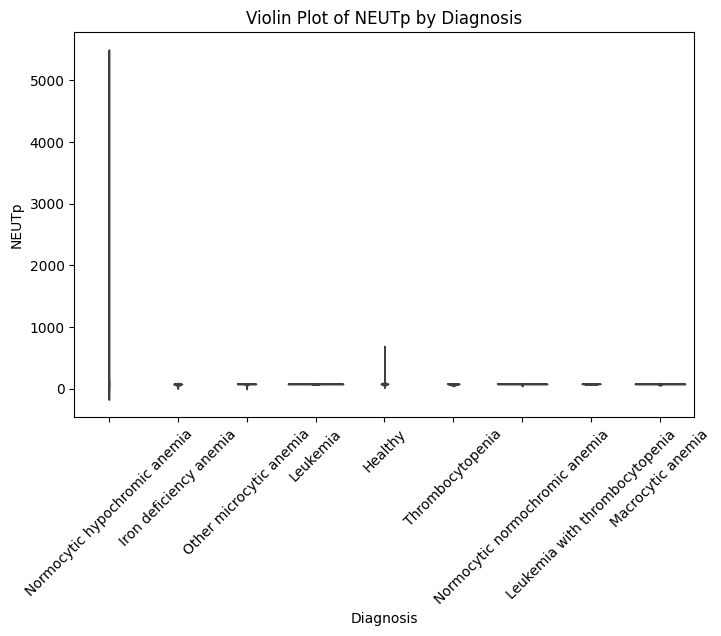

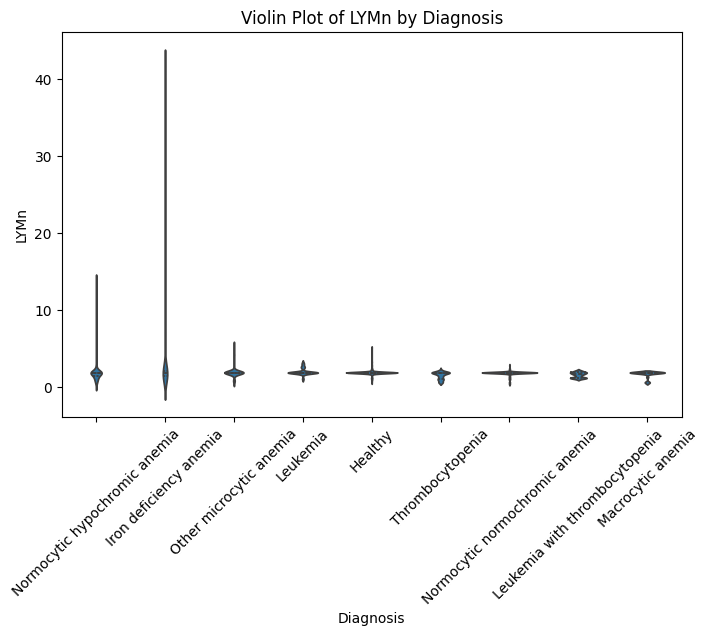

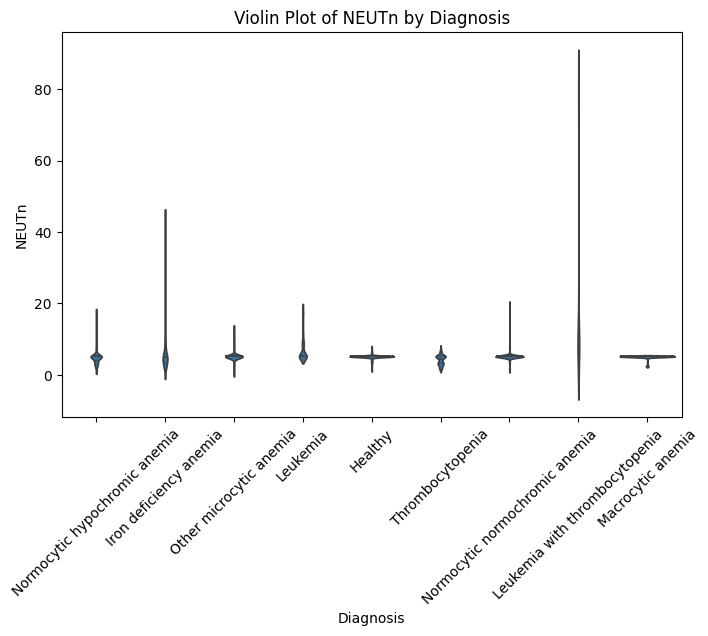

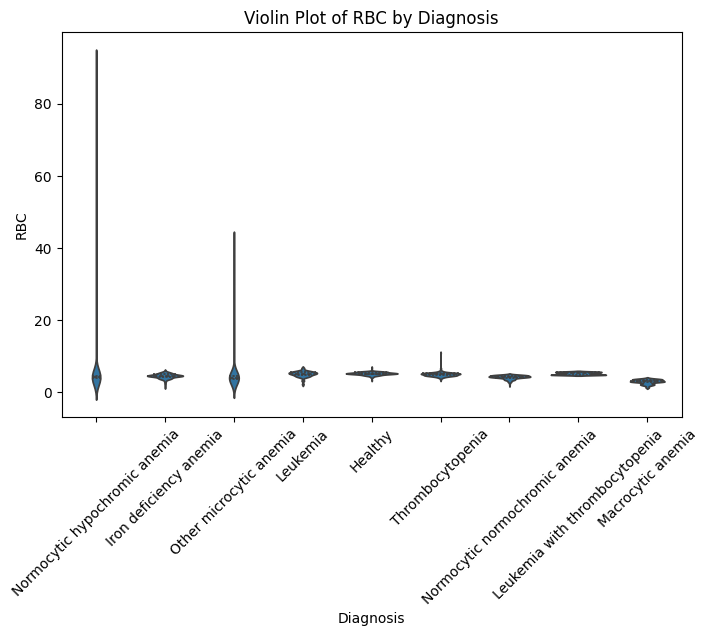

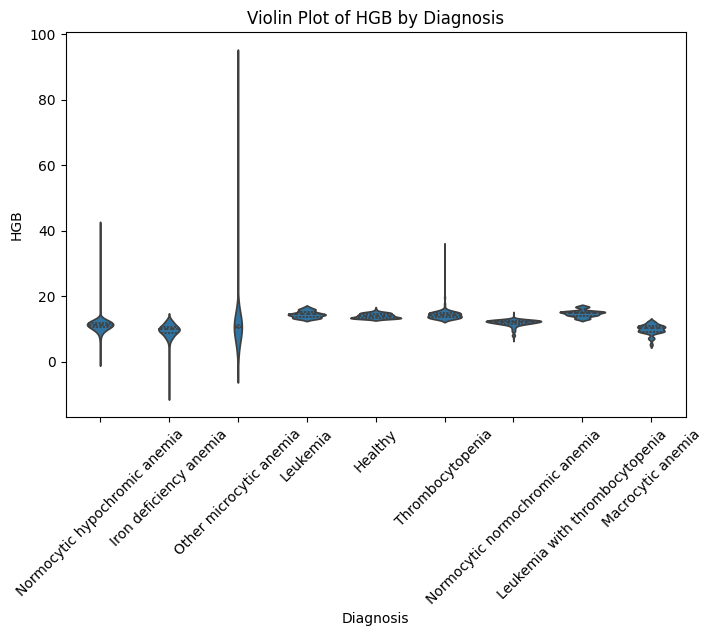

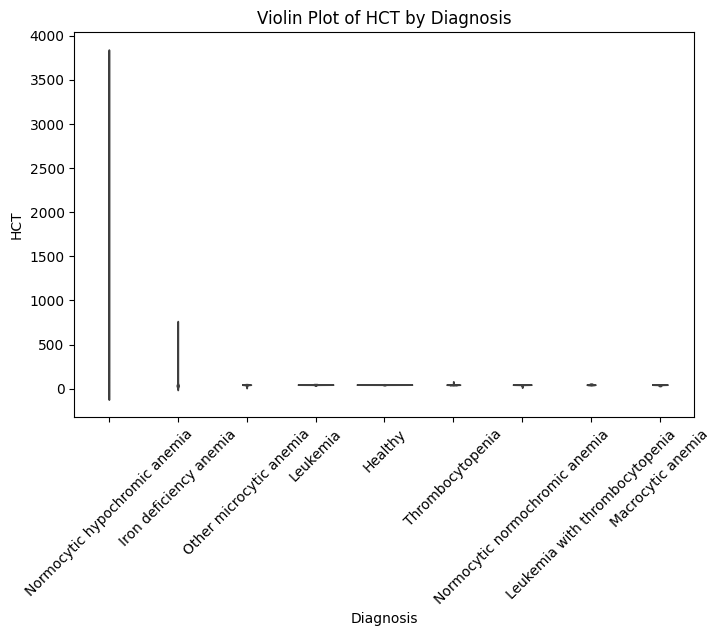

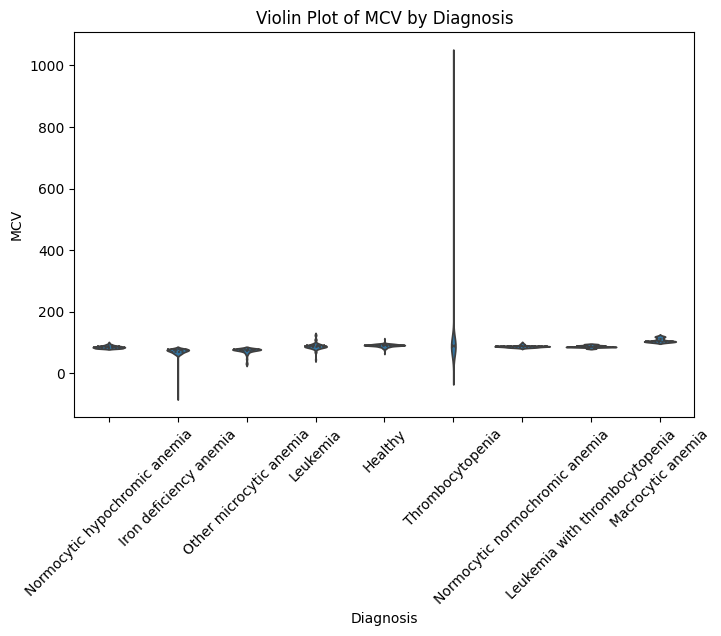

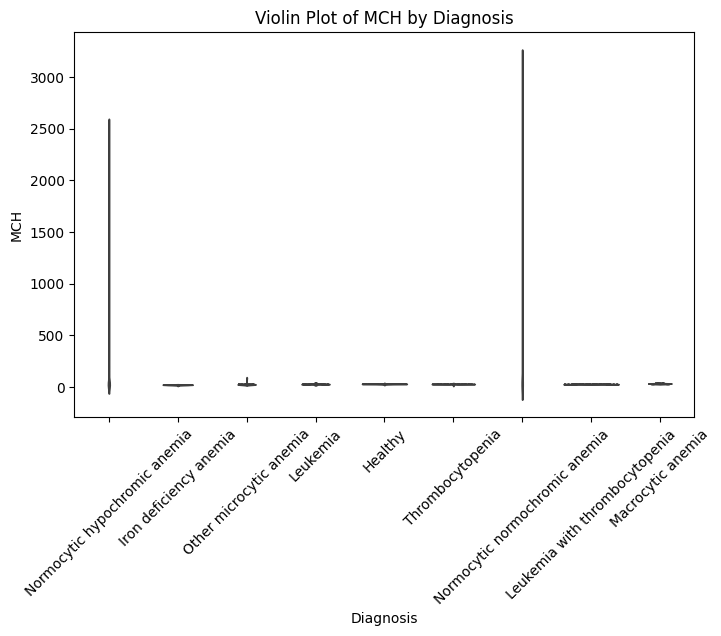

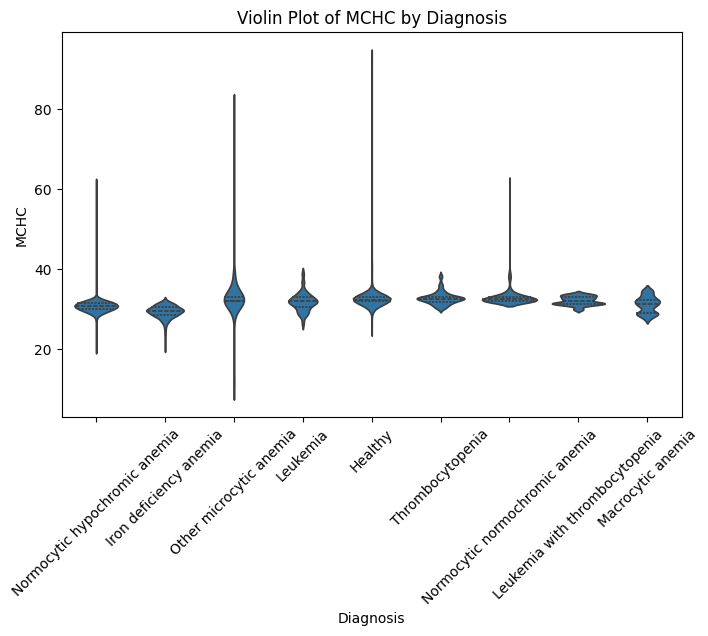

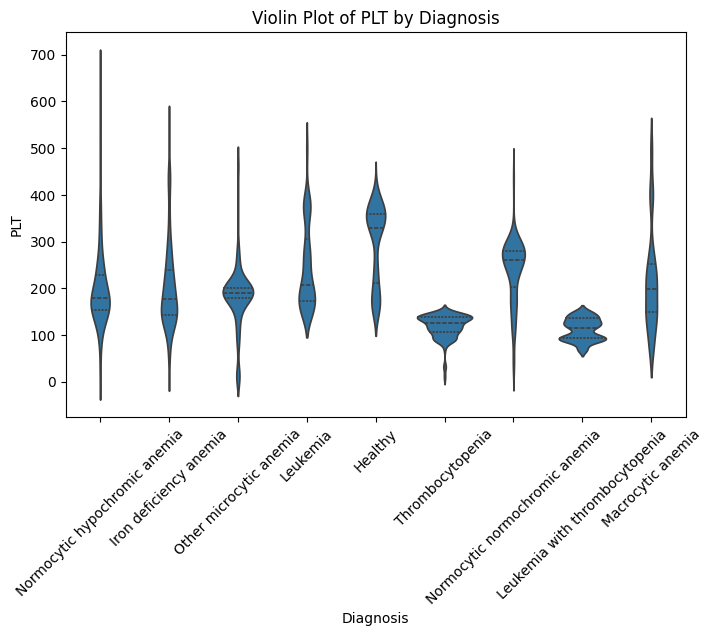

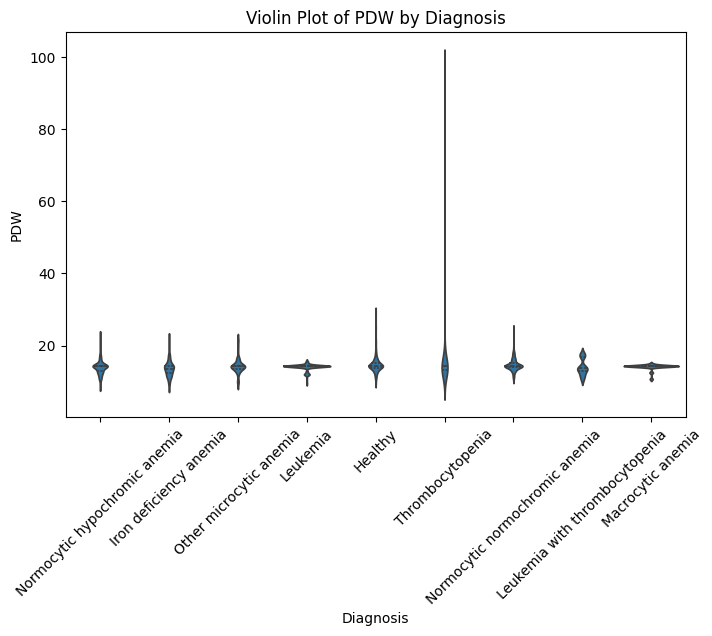

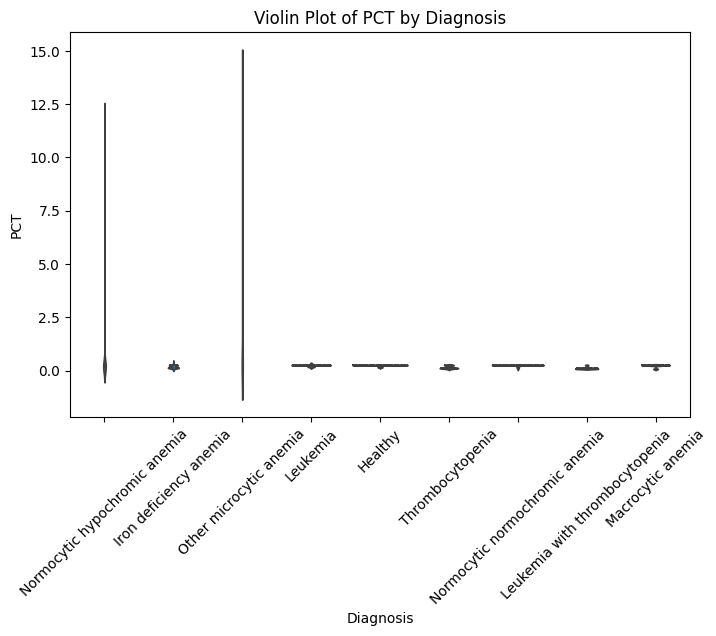

In [54]:
# Violin plots for more detailed distribution by class
for col in numeric_df.columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Diagnosis', y=col, data=df, inner='quartile')
    plt.title(f'Violin Plot of {col} by Diagnosis')
    plt.xticks(rotation=45)
    plt.show()
